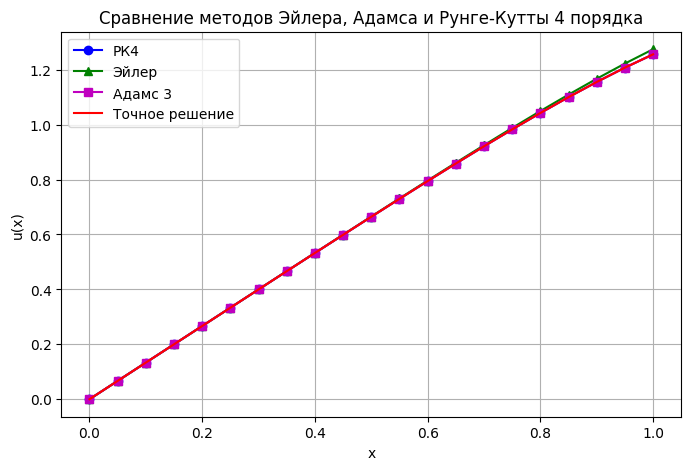

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, u, v):
    return v

def g(x, u, v):
    return np.tanh(x) * v - (np.cosh(x))**2 * u + (x * (np.cosh(x))**2 - np.tanh(x)) / 3

def runge_kutta_4(v, g, u0, v0, x0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    u_values = np.zeros_like(x_values)
    v_values = np.zeros_like(x_values)

    u_values[0] = u0
    v_values[0] = v0

    for i in range(1, len(x_values)):
        x_n, u_n, v_n = x_values[i-1], u_values[i-1], v_values[i-1]

        k1 = h * f(x_n, u_n, v_n)
        l1 = h * g(x_n, u_n, v_n)

        k2 = h * f(x_n + h/2, u_n + k1/2, v_n + l1/2)
        l2 = h * g(x_n + h/2, u_n + k1/2, v_n + l1/2)

        k3 = h * f(x_n + h/2, u_n + k2/2, v_n + l2/2)
        l3 = h * g(x_n + h/2, u_n + k2/2, v_n + l2/2)

        k4 = h * f(x_n + h, u_n + k3, v_n + l3)
        l4 = h * g(x_n + h, u_n + k3, v_n + l3)

        u_values[i] = u_n + (k1 + 2*k2 + 2*k3 + k4) / 6
        v_values[i] = v_n + (l1 + 2*l2 + 2*l3 + l4) / 6

    return x_values, u_values, v_values

def euler_method(f, g, u0, v0, x0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)
    u_values = np.zeros_like(x_values)
    v_values = np.zeros_like(x_values)

    u_values[0] = u0
    v_values[0] = v0

    for i in range(1, len(x_values)):
        x_n, u_n, v_n = x_values[i-1], u_values[i-1], v_values[i-1]

        u_values[i] = u_n + h * f(x_n, u_n, v_n)
        v_values[i] = v_n + h * g(x_n, u_n, v_n)

    return x_values, u_values

def adams_3(f, g, u0, v0, x0, x_end, h):
    # Получаем начальные значения с помощью Рунге-Кутты
    x_values, u_values, v_values = runge_kutta_4(f, g, u0, v0, x0, x0 + 2 * h, h)
    x_list = list(x_values)
    u_list = list(u_values)
    v_list = list(v_values)

    x_values = np.arange(x0 + 2 * h, x_end + h, h)  # Стартуем с 3-й точки

    # Метод Адамса 3-го порядка
    for i in range(2, len(x_values)):
        v_pred = v_list[-1] + h * (23/12 * g(x_list[-1], u_list[-1], v_list[-1]) - 16/12 * g(x_list[-2], u_list[-2], v_list[-2]) + 5/12 * g(x_list[-3], u_list[-3], v_list[-3]))
        u_pred = u_list[-1] + h * (23/12 * v_list[-1] - 16/12 * v_list[-2] + 5/12 * v_list[-3])

        v_corr = v_list[-1] + h * (5/12 * g(x_values[i], u_pred, v_pred) + 8/12 * g(x_list[-1], u_list[-1], v_list[-1]) - 1/12 * g(x_list[-2], u_list[-2], v_list[-2]))
        u_corr = u_list[-1] + h * (5/12 * v_corr + 8/12 * v_list[-1] - 1/12 * v_list[-2])

        x_list.append(x_values[i])
        u_list.append(u_corr)
        v_list.append(v_corr)

    return np.array(x_list), np.array(u_list)

# Начальные условия
u0 = 0
v0 = 4/3

x0 = 0
x_end = 1
h = 0.05

x_vals_rk4, u_vals_rk4, _ = runge_kutta_4(f, g, u0, v0, x0, x_end, h)
x_vals_euler, u_vals_euler = euler_method(f, g, u0, v0, x0, x_end, h)
x_vals_adams, u_vals_adams = adams_3(f, g, u0, v0, x0, x_end, h)

exact_solution = np.sin(np.sinh(x_vals_rk4)) + x_vals_rk4 / 3

plt.figure(figsize=(8, 5))
plt.plot(x_vals_rk4, u_vals_rk4, 'bo-', label='РК4')
plt.plot(x_vals_euler, u_vals_euler, 'g^-', label='Эйлер')
plt.plot(x_vals_adams, u_vals_adams, 'ms-', label='Адамс 3')
plt.plot(x_vals_rk4, exact_solution, 'r-', label='Точное решение')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Сравнение методов Эйлера, Адамса и Рунге-Кутты 4 порядка')
plt.grid()
plt.show()

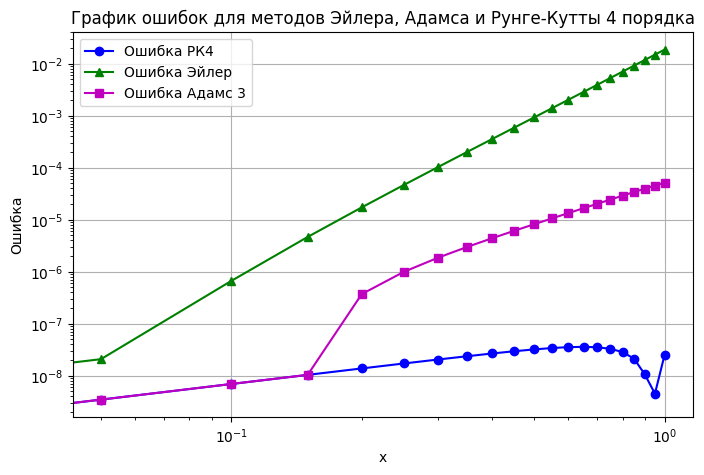

In [ ]:
error_rk4 = np.abs(u_vals_rk4 - exact_solution)
error_euler = np.abs(u_vals_euler - exact_solution[:len(u_vals_euler)])
error_adams = np.abs(u_vals_adams - exact_solution[:len(u_vals_adams)])

plt.figure(figsize=(8, 5))
plt.plot(x_vals_rk4, error_rk4, 'bo-', label='Ошибка РК4')
plt.plot(x_vals_euler, error_euler, 'g^-', label='Ошибка Эйлер')
plt.plot(x_vals_adams, error_adams, 'ms-', label='Ошибка Адамс 3')

plt.yscale('log')  # Логарифмическая шкала по оси Y
plt.xscale('log')  # Логарифмическая шкала по оси X

plt.xlabel('x')
plt.ylabel('Ошибка')
plt.legend()
plt.title('График ошибок для методов Эйлера, Адамса и Рунге-Кутты 4 порядка')
plt.grid()
plt.show()

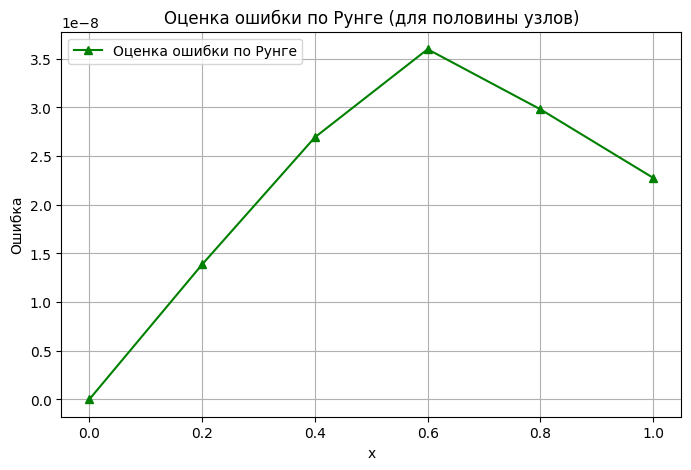

In [ ]:
h = 0.1

x_vals_rk4_h, u_vals_rk4_h, _ = runge_kutta_4(f, g, u0, v0, x0, x_end, h)
x_vals_rk4_h2, u_vals_rk4_h2, _ = runge_kutta_4(f, g, u0, v0, x0, x_end, h/2)

error_runge = np.abs(u_vals_rk4_h - u_vals_rk4_h2[::2]) / 15  # Оценка ошибки для половины узлов

exact_solution = np.sin(np.sinh(x_vals_rk4_h)) + x_vals_rk4_h / 3

plt.figure(figsize=(8, 5))
plt.plot(x_vals_rk4_h[::2], error_runge[::2], 'g^-', label='Оценка ошибки по Рунге')
plt.xlabel('x')
plt.ylabel('Ошибка')
plt.legend()
plt.title('Оценка ошибки по Рунге (для половины узлов)')
plt.grid()
plt.show()

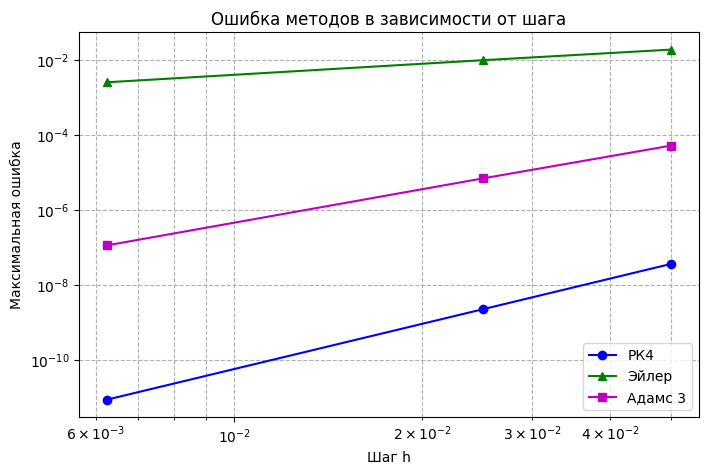

In [ ]:
def max_error(numerical, exact):
    return np.max(np.abs(numerical - exact))

h_values = np.array([0.05, 0.025, 0.00625])
errors_rk4 = []
errors_euler = []
errors_adams = []

for h in h_values:
    x_vals_rk4, u_vals_rk4, _ = runge_kutta_4(f, g, u0, v0, x0, x_end, h)
    x_vals_euler, u_vals_euler = euler_method(f, g, u0, v0, x0, x_end, h)
    x_vals_adams, u_vals_adams = adams_3(f, g, u0, v0, x0, x_end, h)

    exact_solution = np.sin(np.sinh(x_vals_rk4)) + x_vals_rk4 / 3

    errors_rk4.append(max_error(u_vals_rk4, exact_solution))
    errors_euler.append(max_error(u_vals_euler, exact_solution))
    errors_adams.append(max_error(u_vals_adams, exact_solution))

plt.figure(figsize=(8, 5))
plt.loglog(h_values, errors_rk4, 'bo-', label='РК4')
plt.loglog(h_values, errors_euler, 'g^-', label='Эйлер')
plt.loglog(h_values, errors_adams, 'ms-', label='Адамс 3')
plt.xlabel('Шаг h')
plt.ylabel('Максимальная ошибка')
plt.legend()
plt.title('Ошибка методов в зависимости от шага')
plt.grid(True, which="both", linestyle="--")
plt.show()

In [ ]:
print("Тангенс угла наклона для метода Эйлера (идеально = 1):")
print((np.log(errors_euler[0]) - np.log(errors_euler[-1]))/(np.log(h_values[0]) - np.log(h_values[-1])))

Тангенс угла наклона для метода Эйлера:
0.9637017755883655


In [ ]:
print("Тангенс угла наклона для метода Адамса 3 порядка (идеально = 3):")
print((np.log(errors_adams[0]) - np.log(errors_adams[-1]))/(np.log(h_values[0]) - np.log(h_values[-1])))

Тангенс угла наклона для метода Адамса 3 порядка (идеально = 3):
2.9430512120923162


In [ ]:
print("Тангенс угла наклона для метода Рунге-Кутты 4 порядка (идеально = 4):")
print((np.log(errors_rk4[0]) - np.log(errors_rk4[-1]))/(np.log(h_values[0]) - np.log(h_values[-1])))

Тангенс угла наклона для метода Рунге-Кутты 4 порядка (идеально = 4):
4.004564381066321
